In [1]:
import sys
sys.path.append('./cosmic')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import scipy_spe as spe

In [2]:
arr = spe.load('cosmic/EUV053_150p1mA_1D15_4p10KV_60s_15sdump_Mo_09162015.SPE')
arr.shape # (15, 2048, 1)
arr = arr.reshape(arr.shape[:-1]).T

# Using for loop beacause I couldn't figure out a way to do this vectorized

for i, line in enumerate(arr):
    std = np.std(line)
    avg = np.average(line)
    lineshape = line.shape[0]
    line = line - avg
    line = line[line>-std*3]
    line = line[line<std*3]
    line = line + avg

    lineshape = lineshape - line.shape[0]
    arr[i] = line.sum() + np.average(line)*lineshape
    
arr = np.average(arr, axis=1)

In [3]:
igorcosmic = np.loadtxt('cosmic/EUV53_cosmic.txt') # Spectrum with cosmic filter applied in IgorPro

## Top spectrum: Cosmic filter applied in igor / Bottom spectrum: Cosmic filter applied in python

Text(0.5,0,'python_cosmic')

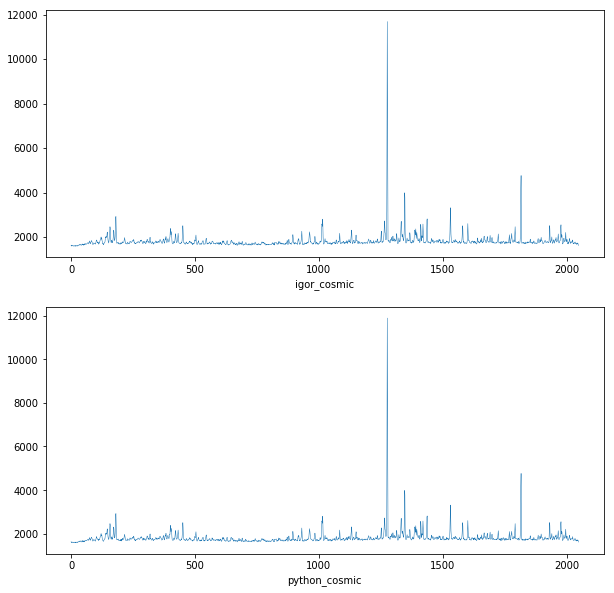

In [4]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.plot(igorcosmic, linewidth=.5)
ax2.plot(arr, linewidth=.5)
ax1.set_xlabel('igor_cosmic')
ax2.set_xlabel('python_cosmic')

## Igor and python on the same plot

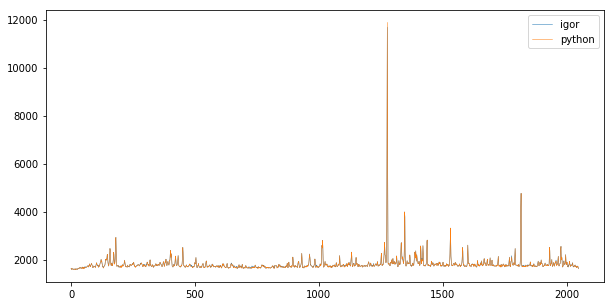

In [5]:
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
ax1.plot(igorcosmic, linewidth=.5)
ax1.plot(arr, linewidth=.5)
ax1.legend(['igor', 'python'])

In [6]:
arr

array([ 1634.,  1608.,  1597., ...,  1709.,  1703.,  1621.])

In [7]:
igorcosmic

array([ 1634.,  1608.,  1597., ...,  1709.,  1703.,  1621.])

In [9]:
sum(abs(arr-igorcosmic))

8605.2000000000007